# Jarod Guign
## Research question/interests

Does the release and continued popularity of triple A multiplayer fps titles effect the player numbers of CS:GO?

## Milestone 3

#### Imports

In [1]:
    import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from project_functions1 import load_process_csgo

### Analysis Pipeline

#### Load Data

In [6]:
chord1 = pd.read_csv('../data/raw/SteamCharts.csv', encoding='latin')
chord2 = pd.read_csv('../data/raw/Twitch_game_data.csv', encoding='latin')
chord3 = pd.read_csv('../data/raw/Twitch_global_data.csv', encoding='latin')
df_csgo = chord1[chord1['gamename'].str.startswith("Counter-Strike: Global Offensive")]
# df_csgo
chord2.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

#### Clean Data

In [85]:
df_csgo['gain'].fillna(0, inplace=True)
df_csgo = df_csgo.drop(['peak', 'avg_peak_perc', 'gamename'], axis = 1)
# df_csgo.pop()
# df_csgo.pop()
# df_csgo

#### Process Data & Wrangled

In [86]:
df_csgo = df_csgo.convert_dtypes()
df_csgo = df_csgo.assign(day= '1')
df_csgo = df_csgo.assign(date= pd.to_datetime(df_csgo['year'].astype(str)  + df_csgo['month'] + df_csgo['day'], format='%Y%B%d'))
df_csgo

,year,month,avg,gain,day,date
0,2021,February,741013.24,-2196.42,1,2021-02-01
1,2021,January,743209.66,25405.91,1,2021-01-01
2,2020,December,717803.75,49049.17,1,2020-12-01
3,2020,November,668754.58,55087.89,1,2020-11-01
4,2020,October,613666.69,6816.37,1,2020-10-01
...,...,...,...,...,...,...
99,2012,November,14134.1,3394.62,1,2012-11-01
100,2012,October,10739.48,-5261.27,1,2012-10-01
101,2012,September,16000.75,525.36,1,2012-09-01
102,2012,August,15475.39,14542.81,1,2012-08-01


In [9]:
df_csgo.pop('year')
df_csgo.pop('month')
df_csgo.pop('day')
df = df_csgo.pop('datetime')
df_csgo.insert(0, 'date', df)
df_csgo_sorted = df_csgo.sort_values('date')
df_csgo_sorted

,date,avg,gain
103,2012-07-01,932.57,0.0
102,2012-08-01,15475.39,14542.81
101,2012-09-01,16000.75,525.36
100,2012-10-01,10739.48,-5261.27
99,2012-11-01,14134.1,3394.62
...,...,...,...
4,2020-10-01,613666.69,6816.37
3,2020-11-01,668754.58,55087.89
2,2020-12-01,717803.75,49049.17
1,2021-01-01,743209.66,25405.91


In [10]:
df_csgo_sorted['rolling_gain'] = df_csgo_sorted['gain'].rolling(7, center=True).mean()
df_csgo_sorted

,date,avg,gain,rolling_gain
103,2012-07-01,932.57,0.0,NaN
102,2012-08-01,15475.39,14542.81,NaN
101,2012-09-01,16000.75,525.36,NaN
100,2012-10-01,10739.48,-5261.27,2175.948571
99,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...
4,2020-10-01,613666.69,6816.37,10223.171429
3,2020-11-01,668754.58,55087.89,16444.632857
2,2020-12-01,717803.75,49049.17,NaN
1,2021-01-01,743209.66,25405.91,NaN


In [11]:
df_csgo_sorted.fillna(0, inplace=True)
df_csgo_sorted

,date,avg,gain,rolling_gain
103,2012-07-01,932.57,0.0,0.000000
102,2012-08-01,15475.39,14542.81,0.000000
101,2012-09-01,16000.75,525.36,0.000000
100,2012-10-01,10739.48,-5261.27,2175.948571
99,2012-11-01,14134.1,3394.62,2348.592857
...,...,...,...,...
4,2020-10-01,613666.69,6816.37,10223.171429
3,2020-11-01,668754.58,55087.89,16444.632857
2,2020-12-01,717803.75,49049.17,0.000000
1,2021-01-01,743209.66,25405.91,0.000000


### Method Chaining

In [4]:
release_dict = {
    'Battlefield':['20131001', '20150301', '20161001', '20181101'],
    'Call of Duty':['20121101', '20131101', '20141101', '20151101', '20161101', '20171101', '20181001', '20191001', '20201101'],
    'Halo':['20191201'],
    'OverWatch':['20160501'],
    'Valorant':['20200601']}
df_csgo_sorted = load_process_csgo('../data/raw/SteamCharts.csv', release_dict)
# df_csgo_sorted.to_csv('../data/processed/analysis1.csv')
df_csgo_sorted

C:\miniconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,date,avg,rolling_avg,gain,rolling_gain,release_Dates
0,2012-11-01,14134.1,14852.294286,3394.62,3300.3800,Call of Duty
1,2012-12-01,14079.39,14921.508571,-54.71,-349.0000,No Releases
2,2013-01-01,16164.22,14922.258571,2084.83,40.8675,No Releases
3,2013-02-01,17372.73,16060.952857,1208.51,1658.3125,No Releases
4,2013-03-01,15959.89,16630.344286,-1412.84,456.4475,No Releases
...,...,...,...,...,...,...
92,2020-07-01,625900.81,683488.915714,-45746.65,-11283.1175,No Releases
93,2020-08-01,639957.66,656510.395714,14056.85,-54411.6400,No Releases
94,2020-09-01,606850.32,649225.895714,-33107.34,-40486.2325,No Releases
95,2020-10-01,613666.69,659449.067143,6816.37,-14495.1925,No Releases


In [4]:
chord1.to_csv('../data/processed/test1.csv', index = False)

In [7]:
test = pd.read_csv('../data/processed/analysis1.csv')
test

,date,avg,gain,rolling_gain,release_Dates
0,2012-08-01,15475.39,14542.81,3300.3800,No Releases
1,2012-09-01,16000.75,525.36,-349.0000,No Releases
2,2012-10-01,10739.48,-5261.27,40.8675,No Releases
3,2012-11-01,14134.10,3394.62,1658.3125,Call of Duty
4,2012-12-01,14079.39,-54.71,456.4475,No Releases
...,...,...,...,...,...
95,2020-07-01,625900.81,-45746.65,-14495.1925,No Releases
96,2020-08-01,639957.66,14056.85,10713.4425,No Releases
97,2020-09-01,606850.32,-33107.34,19461.5225,No Releases
98,2020-10-01,613666.69,6816.37,34089.8350,No Releases


### Exploritory Data Analysis

#### Understanding your Variables

In [6]:
chord1.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [7]:
df_csgo_sorted

,date,avg,gain,rolling_gain
99,2012-11-01,14134.1,3394.62,2348.592857
98,2012-12-01,14079.39,-54.71,69.214286
97,2013-01-01,16164.22,2084.83,0.750000
96,2013-02-01,17372.73,1208.51,1138.694286
95,2013-03-01,15959.89,-1412.84,569.391429
...,...,...,...,...
7,2020-07-01,625900.81,-45746.65,-8195.227143
6,2020-08-01,639957.66,14056.85,-26978.520000
5,2020-09-01,606850.32,-33107.34,-7284.500000
4,2020-10-01,613666.69,6816.37,10223.171429


In [8]:
print(df_csgo_sorted.shape)
print(chord1.shape)

(97, 4)
(83789, 7)


In [7]:
print(chord1.dtypes)

gamename          object
year               int64
month             object
avg              float64
gain             float64
peak               int64
avg_peak_perc     object
dtype: object


In [5]:
chord1.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'], dtype='object')

In [12]:
print(chord1.nunique(axis=0))

gamename          1260
year                10
month               12
avg              53471
gain             37276
peak             12748
avg_peak_perc    71491
dtype: int64


In [14]:
chord1.describe()

,year,avg,gain,peak
count,83789.000000,8.378900e+04,82529.000000,8.378900e+04
mean,2017.338708,2.792017e+03,-10.245559,5.518877e+03
std,2.237587,2.648480e+04,3789.944005,5.015571e+04
min,2012.000000,0.000000e+00,-250248.990000,0.000000e+00
25%,2016.000000,5.325000e+01,-38.310000,1.380000e+02
50%,2018.000000,2.042700e+02,-1.630000,5.020000e+02
75%,2019.000000,7.716500e+02,22.320000,1.741000e+03
max,2021.000000,1.584887e+06,426446.120000,3.236027e+06


#### Visualization

<AxesSubplot:>

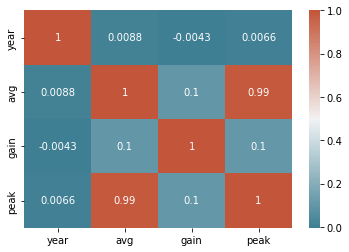

In [9]:
corr = chord1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='month', ylabel='gain'>

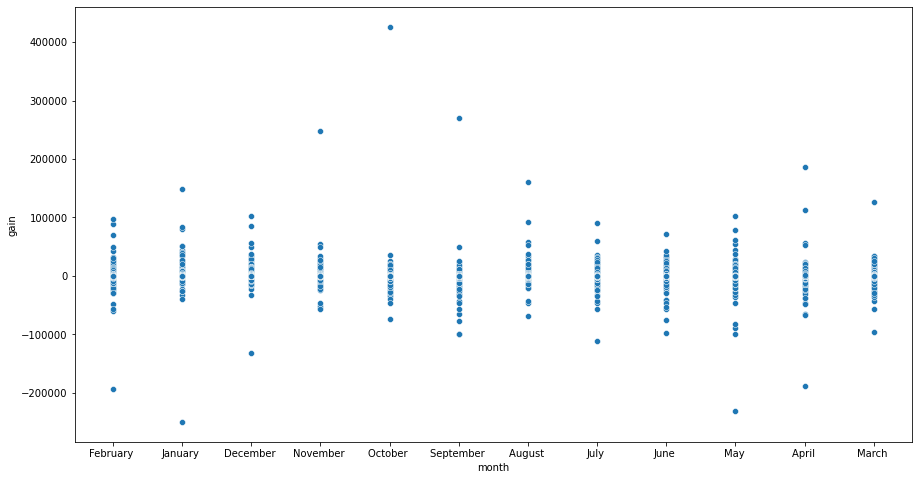

In [12]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'month', y='gain', data = chord1)

<AxesSubplot:xlabel='month', ylabel='avg'>

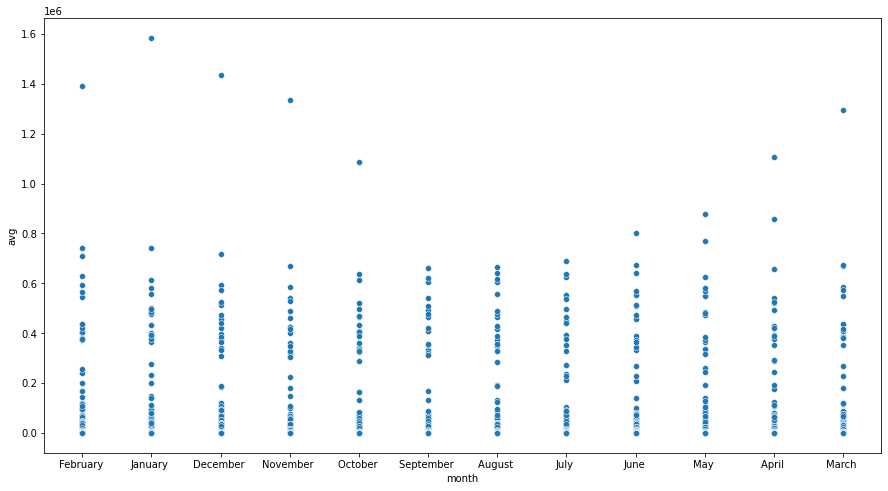

In [14]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'month', y='avg', data = chord1)

<AxesSubplot:xlabel='month', ylabel='peak'>

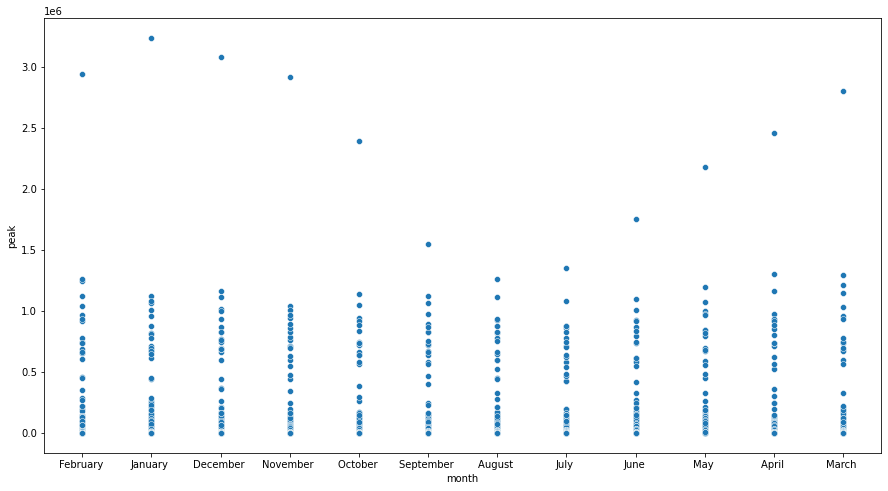

In [15]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'month', y = 'peak', data = chord1)

<AxesSubplot:ylabel='Frequency'>

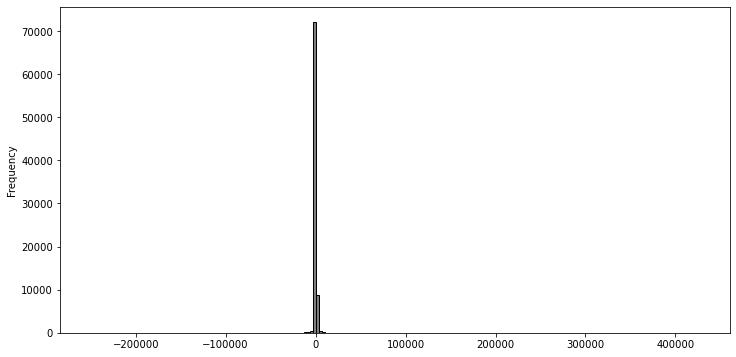

In [17]:
chord1['gain'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

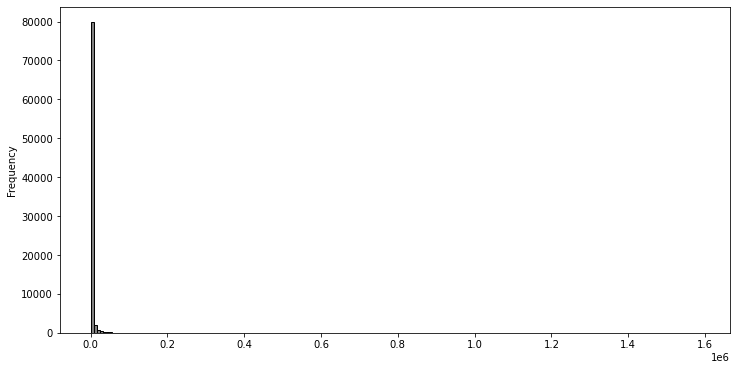

In [18]:
chord1['avg'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

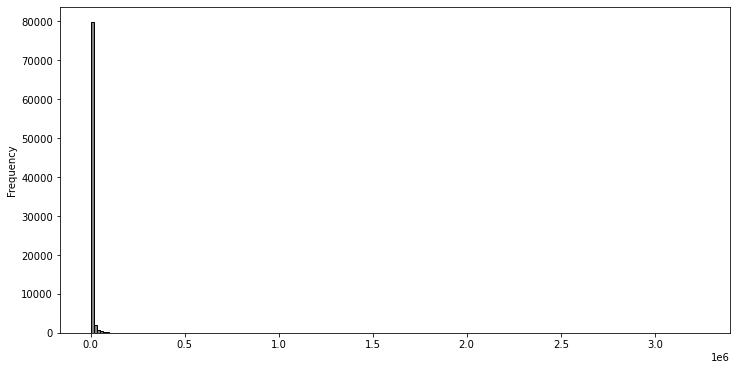

In [19]:
chord1['peak'].plot(kind='hist', bins=200, figsize=(12, 6), facecolor='grey', edgecolor='black')

<AxesSubplot:>

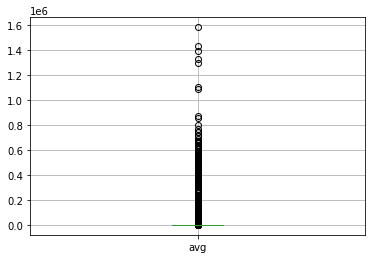

In [20]:
chord1.boxplot('avg')

<AxesSubplot:>

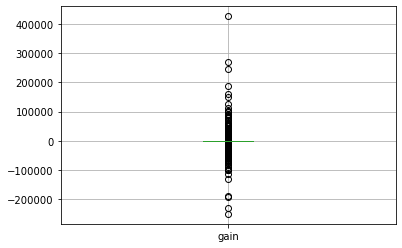

In [21]:
chord1.boxplot('gain')